# Project: Wrangling and Analyze Data

## Author:
### Victor Mayowa, ADELEYE (MB;BS), Google Certified Data Analyst and Udacity Scholar

## Table of Contents
<ul>
<li><a href="#gather">Data Gathering </a></li>
<li><a href="#assess">Assessing Data</a></li>
<li><a href="#clean">Cleaning Data</a></li>
<li><a href="#store">Storing Data</a></li>
<li><a href="#visualizing">Analysing and Visualizing</a></li>
<li><a href="#references">References</a></li>
</ul>

<a id='gather'></a>

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
#import package to get the content of WeRateDogs Twitter archive data link on website
import requests
import json
import re

In [ ]:
#downloading the twitter-archive-enhanced.csv from website link 
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv'
r_csv=requests.get(url)

open url
with open('twitter_archive_enhanced.csv',mode='wb') as file:
    file.write(r_csv.content)

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [ ]:
# getting  the image prediction data
url_tsv='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r_tsv=requests.get(url_tsv)

open url
with open('image_predictions.tsv',mode='wb') as file_tsv:
    file_tsv.write(r_tsv.content)

### IMPORT PACKAGES FOR DATA WRANGLING AND VISUALIZATION 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [3]:
# viewing full columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
#LOAD 'twitter_archive_enhanced.csv' INTO DATAFRAME
twt = pd.read_csv('twitter_archive_enhanced.csv')

In [5]:
#LOAD 'image_predictions.tsv' DATA INTO DATAFRAME
img= pd.read_table('image_predictions.tsv')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

#Query Twitter API for each tweet in the Twitter archive and save JSON in a tet file
#These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


tweet_ids = twt.tweet_id.values
len(tweet_ids)

#Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
#Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()

print(end - start)
print(fails_dict)

In [6]:
# extracting the scraped text file into a list.
tweets=[]
with open('tweet-json.txt', 'r') as file:
    for line in file:
        twt_data= json.loads(line)
        tweets.append(twt_data)

In [7]:
# passing the scraped data into dataframe
tweet_scraped = pd.DataFrame(tweets, columns = ['id','retweet_count', 'favorite_count'])
tweet_scraped.head(5)

id  retweet_count  favorite_count
0  892420643555336193           8853           39467
1  892177421306343426           6514           33819
2  891815181378084864           4328           25461
3  891689557279858688           8964           42908
4  891327558926688256           9774           41048

<a id='assess'></a>

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [8]:
twt_copy= twt.copy()
img_copy= img.copy()
tweet_scraped_copy= tweet_scraped.copy()

## Visual Assessment

### Visual scanning 'twt_copy' dataframe

In [9]:
# sampling the twt data
twt_copy.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2072  671109016219725825                    NaN                  NaN   
241   846505985330044928                    NaN                  NaN   
1796  677301033169788928                    NaN                  NaN   
1496  692530551048294401                    NaN                  NaN   
49    882762694511734784                    NaN                  NaN   

                      timestamp  \
2072  2015-11-29 23:30:32 +0000   
241   2017-03-27 23:35:28 +0000   
1796  2015-12-17 01:35:24 +0000   
1496  2016-01-28 02:12:04 +0000   
49    2017-07-06 00:46:41 +0000   

                                                 source  \
2072  <a href="http://twitter.com/download/iphone" r...   
241   <a href="http://twitter.com/download/iphone" r...   
1796  <a href="http://twitter.com/download/iphone" r...   
1496  <a href="http://twitter.com/download/iphone" r...   
49    <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
2072  This is Toby. He asked for chocolate cake for ...                  NaN   
241   THIS WAS NOT HIS FAULT HE HAD NO IDEA. 11/10 S...                  NaN   
1796  This is Juckson. He's totally on his way to a ...                  NaN   
1496  Say hello to Cody. He's been to like 80 countr...                  NaN   
49    This is Gus. He's quite the cheeky pupper. Alr...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
2072                       NaN                        NaN   
241                        NaN                        NaN   
1796                       NaN                        NaN   
1496                       NaN                        NaN   
49                         NaN                        NaN   

                                          expanded_urls  rating_numerator  \
2072  https://twitter.com/dog_rates/status/671109016...                 8   
241   https://twitter.com/shomaristone/status/846484...                11   
1796  https://twitter.com/dog_rates/status/677301033...                 5   
1496  https://twitter.com/dog_rates/status/692530551...                10   
49    https://twitter.com/dog_rates/status/882762694...                12   

      rating_denominator     name doggo floofer  pupper puppo  
2072                  10     Toby  None    None    None  None  
241                   10     None  None    None    None  None  
1796                  10  Juckson  None    None    None  None  
1496                  10     Cody  None    None    None  None  
49                    10      Gus  None    None  pupper  None

#### Observations:
1. A lot of null values in in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns
2. The ratings_numerator and denominator seems to have been extracted from the text.
3. there are ratings_numerators showed to have ratings above 10. it was said to have been part of the rating system of organization.
4. There seems to be some rows with invalid names e.g 'a'
5. the name column has some rows with 'None' value
6. doggo, floofer, puppo and pupper columns have a lot of none columns and it seems when one of the breed is filled, others are filled as none. so, the columns value can be merged to form one column.

##### I will look more into this with programmatic assessments 

### Visually scanning through 'img_copy' dataframe of the image-predictions data

In [10]:
# sampling the image prediction data 
img_copy.sample(5)

tweet_id                                          jpg_url  \
1205  741793263812808706  https://pbs.twimg.com/media/CkthBj7WgAAsIGb.jpg   
345   672272411274932228  https://pbs.twimg.com/media/CVRkLuJWUAAhhYp.jpg   
1845  838921590096166913  https://pbs.twimg.com/media/C6Ryuf7UoAAFX4a.jpg   
2065  890240255349198849  https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg   
432   674291837063053312  https://pbs.twimg.com/media/CVuQ2LeUsAAIe3s.jpg   

      img_num              p1   p1_conf  p1_dog                  p2   p2_conf  \
1205        1          kuvasz  0.311325    True      French_bulldog  0.115349   
345         2             pug  0.914685    True  Norwegian_elkhound  0.014982   
1845        1  Border_terrier  0.664538    True   Brabancon_griffon  0.170451   
2065        1        Pembroke  0.511319    True            Cardigan  0.451038   
432         1        Cardigan  0.611525    True            Pembroke  0.368566   

      p2_dog                  p3   p3_conf  p3_dog  
1205    True  Labrador_retriever  0.068533    True  
345     True         Siamese_cat  0.009221   False  
1845    True   Yorkshire_terrier  0.087824    True  
2065    True           Chihuahua  0.029248    True  
432     True           Chihuahua  0.003330    True

#### Observations:
1. The confidence interval of the machine learning model from p1 seems to have been highest across board i.e it tends to have the better predictive chance.
2. the names of the the  machine models(p1,p2,p3) sbould be changed to an easily recognisible names

### Visually scanning through 'tweeter_scraped_copy' dataframe scraped from twitter

In [11]:
tweet_scraped_copy.sample(5)

id  retweet_count  favorite_count
2282  667192066997374976            115             414
2228  668237644992782336           3100            6614
1031  745074613265149952           3976            8605
2336  666104133288665088           6871           14765
395   825147591692263424           5244           20181

#### Observations:
1. id columns is different from the names given to the identifications in other data provided.

## Programmatical Assessment

### Programmatically scanning the Twitter Archive data  represented by 'twt_copy' dataframe

In [12]:
# checking if there is any duplicated value 
twt_copy[twt_copy.duplicated()].shape

(0, 17)

No duplicated rows in twt dataframe

In [13]:
# getting the information of the twitter archive file
twt_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### Observation:
1. The tweet_id, in_reply_to_status_id,in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id columns are in numerical(floats and integer) datatype instead of string as an identification numbers.
2. Large chunk of the in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp are

#### SCRUTINIZING  COLUMNS

In [14]:
# checking for the details attached to the text column
pd.set_option('display.max_colwidth', 1000)
twt_copy.text.sample(10)

2149                                             After countless hours of research and hundreds of formula alterations we have concluded that Dug should be bumped to an 11/10
885                                             RT @hownottodraw: The story/person behind @dog_rates is heckin adorable af. 11/10, probably would pet. https://t.co/AG5UnRrmzJ
1975                                                    Say hello to Kenzie. She is a fluff ball. 12/10 you'd need to taser me for me to let go of her https://t.co/dph1UHNJrg
424                              This is Harlso. He has a really good idea but isn't sure you're going to like it. 13/10 he'll just keep it to himself https://t.co/IzcaR3Nqyn
248     Say hello to Mimosa. She's an emotional support doggo who helps her owner with PTSD. 13/10, but she needs your help\n\nhttps://t.co/L6mLzrd7Mx https://t.co/jMutBFdw5o
2305                                My goodness. Very rare dog here. Large. Tail dangerous. Kinda fat. Only eats leaves. Does

In [15]:
# checking for the details attached to the source
pd.set_option('display.max_colwidth', 1000)
twt_copy.source.sample(10)

648     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
225     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
1861    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
8       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
1010    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2302    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2110    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
1890    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2274                    <a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>
1373    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
Name: source, dtype: object

In [16]:
# counting frequency of each unique value in the source column
twt_copy.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

1. the source column is not tidy as the source of post is jumbled up with links and html junks.
2. most of the tweets came from iphone users

In [17]:
#sampling the ratin_numerator column
twt_copy.rating_numerator.sample(10)

848     12
1144     9
751     13
1994    11
1899     9
2094    10
1599    12
750     12
924     14
341     13
Name: rating_numerator, dtype: int64

In [18]:
# getting the amount of values that are out of normal range(10)
twt_copy.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

In [19]:
twt_copy[twt_copy.rating_denominator != 10]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
313   835246439529840640           8.352460e+17         2.625958e+07   
342   832088576586297345           8.320875e+17         3.058208e+07   
433   820690176645140481                    NaN                  NaN   
516   810984652412424192                    NaN                  NaN   
784   775096608509886464                    NaN                  NaN   
902   758467244762497024                    NaN                  NaN   
1068  740373189193256964                    NaN                  NaN   
1120  731156023742988288                    NaN                  NaN   
1165  722974582966214656                    NaN                  NaN   
1202  716439118184652801                    NaN                  NaN   
1228  713900603437621249                    NaN                  NaN   
1254  710658690886586372                    NaN                  NaN   
1274  709198395643068416                    NaN                  NaN   
1351  704054845121142784                    NaN                  NaN   
1433  697463031882764288                    NaN                  NaN   
1598  686035780142297088           6.860340e+17         4.196984e+09   
1634  684225744407494656           6.842229e+17         4.196984e+09   
1635  684222868335505415                    NaN                  NaN   
1662  682962037429899265                    NaN                  NaN   
1663  682808988178739200           6.827884e+17         4.196984e+09   
1779  677716515794329600                    NaN                  NaN   
1843  675853064436391936                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   

                      timestamp  \
313   2017-02-24 21:54:03 +0000   
342   2017-02-16 04:45:50 +0000   
433   2017-01-15 17:52:40 +0000   
516   2016-12-19 23:06:23 +0000   
784   2016-09-11 22:20:06 +0000   
902   2016-07-28 01:00:57 +0000   
1068  2016-06-08 02:41:38 +0000   
1120  2016-05-13 16:15:54 +0000   
1165  2016-04-21 02:25:47 +0000   
1202  2016-04-03 01:36:11 +0000   
1228  2016-03-27 01:29:02 +0000   
1254  2016-03-18 02:46:49 +0000   
1274  2016-03-14 02:04:08 +0000   
1351  2016-02-28 21:25:30 +0000   
1433  2016-02-10 16:51:59 +0000   
1598  2016-01-10 04:04:10 +0000   
1634  2016-01-05 04:11:44 +0000   
1635  2016-01-05 04:00:18 +0000   
1662  2016-01-01 16:30:13 +0000   
1663  2016-01-01 06:22:03 +0000   
1779  2015-12-18 05:06:23 +0000   
1843  2015-12-13 01:41:41 +0000   
2335  2015-11-16 16:11:11 +0000   

                                                                                  source  \
313   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
342   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
433   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
516   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
784   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
902   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1068  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1120  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1165  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1202  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1228  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1254  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1274  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1351  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1433  <a href="http://twitter.com/download/iphone" rel="nofollow">

In [20]:
twt_copy.text.sample(10)

2230     This is Torque. He served his nickel. Better not owe Torque money. Torque will find u. 10/10 cause I'm scared of him https://t.co/TnSRDqYO5i
1213                   This is Nico. His selfie game is strong af. Excellent use of a sneaky tongue slip. 10/10 star material https://t.co/1OBdJkMOFx
243                          SHE DID AN ICY ZOOM AND KNEW WHEN TO PUT ON THE BRAKES 13/10 CANCEL THE GAME THIS IS ALL WE NEED https://t.co/4ctgpGcqAd
2071     Meet Phred. He isn't steering, looking at the road, or wearing a seatbelt. Phred is a rolling tornado of danger 6/10 https://t.co/mZD7Bo7HfV
2307                                                                                               12/10 simply brilliant pup https://t.co/V6ZzG45zzG
2007                      This is Kreg. He has the eyes of a tyrannical dictator. Will not rest until household is his. 10/10 https://t.co/TUeuaOmunV
1672    Meet Brody. He's a Downton Abbey Falsetto. Addicted to grating cheese. He says he can stop b

- **I decided not to touch the numerator as the ratings used was permitted by @WeRateDogs.
However, for the denominator which must be /10, I discovered there were some misimputation of values(23 values) which i might either drop because of the inconsistencies or make equal to 10 depending on directives from stackeholders.**

- it was found out that the dog nicknames and ratings were extracted from the tweet (text column)
- #### From the text column, I found out the tweets implicated, they are:
tweet_id: 740373189193256964 - 9//11 to 14/10; tweet_id: 722974582966214656 - 4/20 to 13/10; tweet_id: 716439118184652801 - 50/50 to 11/10; tweet_id: 682962037429899265 - 7/11 to 10/10; tweet_id: 666287406224695296 - 1/2 to 9/10

In [21]:
#sampling the 'name' column
twt_copy.name.sample(5)

722       Earl
38        Earl
613        Tyr
1379    Millie
115       Zoey
Name: name, dtype: object

In [22]:
#counting numbers of unique values in 'name' column 
twt_copy.name.value_counts().head(5)

None       745
a           55
Charlie     12
Oliver      11
Lucy        11
Name: name, dtype: int64

In [23]:
#extracting the observations with lower case alphabeth in the 'name' column
twt_copy[twt_copy.name.str.contains('^[a-z]')].name.value_counts()

a               55
the              8
an               7
very             5
one              4
quite            4
just             4
getting          2
actually         2
not              2
mad              2
such             1
light            1
life             1
incredibly       1
officially       1
all              1
my               1
this             1
infuriating      1
old              1
by               1
space            1
unacceptable     1
his              1
Name: name, dtype: int64

In [24]:
#getting the total numbers of observations implicated
twt_copy[twt_copy.name.str.contains('^[a-z]')].name.value_counts().sum()

109

###### OBSERVATION:
1. **As mentioned while visually assessing the data, there were some name values which are usually in lower alphabetic case all through (a, an, mad, the, very, one, not, actually, this, by, such, space, and so on )  which are inconsistent with other values with first letter capitalised. About 109 of the observations were immplicated**

2. **There are 745 observations tagged 'None' i.e without name.** 

###### 3. The doggo, puppo, pupper and floofer column with 'None' will be combined.

In [25]:
#descriptive statistics of the twitter achive data 
twt_copy.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

--------------------------------------------------------------

### Programmatically scanning the Image Predictions data  represented by 'img_copy' dataframe

In [26]:
# sampling the image prediction data copied
img_copy.sample(15)

tweet_id  \
1757  825147591692263424   
1398  768473857036525572   
1878  846153765933735936   
405   673707060090052608   
879   698549713696649216   
268   670811965569282048   
1302  752917284578922496   
471   675135153782571009   
740   687312378585812992   
682   683834909291606017   
1197  740676976021798912   
1708  817827839487737858   
1346  759197388317847553   
134   668484198282485761   
966   706291001778950144   

                                                                                      jpg_url  \
1757                                          https://pbs.twimg.com/media/C3ODWpfXAAAP1fb.jpg   
1398                                          https://pbs.twimg.com/media/Cqoq5PGWAAA-U8T.jpg   
1878                                          https://pbs.twimg.com/media/C74kWqoU8AEaf3v.jpg   
405                                           https://pbs.twimg.com/media/CVl8_EPWoAAcuSC.jpg   
879                                           https://pbs.twimg.com/media/CbG_QRJXEAALVWy.jpg   
268                                           https://pbs.twimg.com/media/CU8z65IUEAQBc4q.jpg   
1302                                          https://pbs.twimg.com/media/CnLmRiYXEAAO_8f.jpg   
471                                           https://pbs.twimg.com/media/CV6P1lnWIAAUQHk.jpg   
740                                           https://pbs.twimg.com/media/CYnS9VWW8AAeR8m.jpg   
682   https://pbs.twimg.com/ext_tw_video_thumb/683834825250320385/pu/img/yZdrqMlyky4KGOu6.jpg   
1197                                          https://pbs.twimg.com/media/Ckdpx5KWsAANF6b.jpg   
1708  https://pbs.twimg.com/ext_tw_video_thumb/817827663108771841/pu/img/e9oi839RGWJR37jF.jpg   
1346                                          https://pbs.twimg.com/media/Cok1_sjXgAU3xpp.jpg   
134                                           https://pbs.twimg.com/media/CUbu1GAWsAEH3E-.jpg   
966                                           https://pbs.twimg.com/media/Cc0_2tXXEAA2iTY.jpg   

      img_num                           p1   p1_conf  p1_dog  \
1757        1                     Pekinese  0.354823    True   
1398        1           Labrador_retriever  0.739170    True   
1878        1              giant_schnauzer  0.346468    True   
405         1  German_short-haired_pointer  0.935771    True   
879         1               French_bulldog  0.998544    True   
268         1                       basset  0.994090    True   
1302        1              German_shepherd  0.609283    True   
471         1                        stove  0.587507   False   
740         1                    seat_belt  0.703561   False   
682         1                  Maltese_dog  0.738449    True   
1197        1                       wombat  0.462952   False   
1708        1               cocker_spaniel  0.387608    True   
1346        1                       kuvasz  0.511341    True   
134         1              standard_poodle  0.587372    True   
966         1               Border_terrier  0.587101    True   

                            p2   p2_conf  p2_dog                         p3  \
1757                Pomeranian  0.245390    True                 toy_poodle   
1398  Chesapeake_Bay_retriever  0.246488    True                     kelpie   
1878     flat-coated_retriever  0.218451    True         Labrador_retriever   
405                     kelpie  0.022561    True         Labrador_retriever   
879                Boston_bull  0.001404    True                      boxer   
268               Walker_hound  0.003973    True                     beagle   
1302                  malinois  0.352460    True                     kelpie   
471                 rotisserie  0.051713   False                  microwave   
740                 Great_Dane  0.139909    True                 Weimaraner   
682                 toy_poodle  0.102992    True                    Samoyed   
1197        Norwegian_elkhound  0.275225    True                Siamese_cat   
1708          golden_retriever  0.264844 

In [27]:
img_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [28]:
# checking for duplicated observattions in the image prediction data
img_copy[img_copy.duplicated()].shape

(0, 12)

No duplicated columns in img_copy dataframe

In [29]:
# descriptive statistics of the image prediction data copy
img_copy.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [30]:
# getting the frequecy of unique values in the predictions in model 1
img_copy.p1.value_counts().head()
# counting through the unique names in p1, golden_retriever was most predicted

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
Name: p1, dtype: int64

In [31]:

img_copy.p2.value_counts().sample(5)
# counting through the unique names in p2, Labrador_retriever was most predicted

crossword_puzzle    2
triceratops         1
Persian_cat         2
canoe               1
timber_wolf         1
Name: p2, dtype: int64

In [32]:
img_copy.p3.value_counts().head(5)
# counting through the unique names in p3, Labrador_retriever was most predicted

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
Name: p3, dtype: int64

##### OBSERVATIONS:
**The tweeter_id  is in numerical datatype instead of strings**

---------------------------------------------

### Programmatically scanning the scraped data represented by 'tweet_scraped_copy' dataframe

In [33]:
#sampling the scraped data for aerial assessment
tweet_scraped_copy.sample(10)

id  retweet_count  favorite_count
1683  681654059175129088           1045            2903
822   769940425801170949          11131           34948
2239  667915453470232577             59             222
375   828046555563323392           3260           12923
1812  676617503762681856           1108            3149
1452  695446424020918272           2026            4787
1258  710269109699739648           1257            2613
1420  698178924120031232            830            3084
1210  715342466308784130            768            3294
811   771136648247640064           3357           10223

In [34]:
# summary of scrape data
tweet_scraped_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [35]:
# descriptive statistiics of columns in scraped data
tweet_scraped_copy.describe()

id  retweet_count  favorite_count
count  2.354000e+03    2354.000000     2354.000000
mean   7.426978e+17    3164.797366     8080.968564
std    6.852812e+16    5284.770364    11814.771334
min    6.660209e+17       0.000000        0.000000
25%    6.783975e+17     624.500000     1415.000000
50%    7.194596e+17    1473.500000     3603.500000
75%    7.993058e+17    3652.000000    10122.250000
max    8.924206e+17   79515.000000   132810.000000

In [36]:
# checking for duplicated values in scraped data
tweet_scraped_copy[tweet_scraped_copy.duplicated()].shape

(0, 3)

    No duplicated columns in tweet_scraped_copy dataframe

The tweet_id column is in numerical datatype instead of string as an identification number

The id column is in numerical datatype instead of string as an identification number

## Quality issues

#### 'twt_copy' table from 'twitter_enhanced_archive.csv' file

1. 'tweet_id', 'retweeted_status_user_id','retweeted_status_id' column in numerical datatype instead of strings.
2. 'timestamp', 'retweeted_status_timestamp',  column in string datatype instead of datetime
3.  Most(large percentage) of the observations in columns like in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns.
4.  there are ratings_numerators showed to have ratings above 10. it was said to have been part of the rating system of organization. However, for the denominator which must be /10, I discovered inconsistencies as some observations have denominators less than and some more than 10.
5. Some observations in 'name' column are in lower alphabetic case all through ( such as a, an, mad, the, very, one, not, actually, this, by, such, space, and so on ) which are inconsistent with other observationss with first letter capitalized. About 109 of the observations were implicated. There are 745 observations tagged 'None' i.e without name.
6. The 'source' column is not tidy as the source of post is jumbled up with links and html junks.
----
#### 'img_copy' table from 'image-predictions.tsv' file

7. 'tweet_id' in integer datatype instead of strings as an identification number 
8.  title of some columns(p1, p2, p3, p1_conf, p2_conf, p3_conf) in ' img_copy' table are not well defined for easy understanding.
-------
#### 'tweet_scraped_copy' table from scraped data
9. the 'id' column is in numerical datatype instead of strings as an identification number.

### Tidiness issues
10. the values of doggo, floofer, pupper and puppo int 'twt_copy' table should be combined into one column.
11. the name of the identification column ('id') is different from the identification name given to the other tables provided ('tweet_id')
12. combine all dataframe into one

<a id='clean'></a>

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [37]:
# Make copies of original pieces of data
twt_clean = twt_copy.copy()
img_clean = img_copy.copy()
scraped_clean = tweet_scraped_copy.copy()

### Issue #1:

#### Define:  'tweet_id', 'retweeted_status_user_id','retweeted_status_id' column in numerical datatype instead of strings.

#### Code

In [38]:
twt_clean.tweet_id = twt_clean.tweet_id.astype('str')
twt_clean.retweeted_status_id = twt_clean.retweeted_status_id.astype('str')
twt_clean.retweeted_status_user_id = twt_clean.retweeted_status_user_id.astype('str')

#### Test

In [39]:
twt_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         2356 non-null   object 
 7   retweeted_status_user_id    2356 non-null   object 
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Issue #2:

#### Define: 'timestamp', 'retweeted_status_timestamp',  column in string datatype instead of datetime

#### Code

In [40]:
twt_clean.timestamp = pd.to_datetime(twt_clean.timestamp)
twt_clean.retweeted_status_timestamp = pd.to_datetime(twt_clean.retweeted_status_timestamp)

#### Test

In [41]:
twt_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         2356 non-null   object             
 7   retweeted_status_user_id    2356 non-null   object             
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue #3:

### Define: Most (large percentage) of the observations in columns like in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns.

#### Code:

In [42]:
twt_clean['retweeted_status_id'] = twt_clean.retweeted_status_id.map({'nan':None})
twt_clean=twt_clean[twt_clean['retweeted_status_id'].isnull()]

In [43]:
twt_clean['retweeted_status_user_id'] = twt_clean.retweeted_status_user_id.map({'nan':None})
twt_clean=twt_clean[twt_clean['retweeted_status_user_id'].isnull()]

In [44]:
twt_clean = twt_clean[twt_clean.retweeted_status_timestamp.isnull()]

In [45]:
twt_clean = twt_clean[twt_clean.columns.difference(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'])]

### Test:


In [46]:
twt_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   doggo               2175 non-null   object             
 1   floofer             2175 non-null   object             
 2   name                2175 non-null   object             
 3   pupper              2175 non-null   object             
 4   puppo               2175 non-null   object             
 5   rating_denominator  2175 non-null   int64              
 6   rating_numerator    2175 non-null   int64              
 7   source              2175 non-null   object             
 8   text                2175 non-null   object             
 9   timestamp           2175 non-null   datetime64[ns, UTC]
 10  tweet_id            2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(8)
memory usage: 203.9+ KB


### Issue 4:  

### Define: 
----------------
#### Some observations in ratings_numerators have ratings above 10. it was said to have been part of the rating system of organization. 
####  However, for the denominator which almost always equal to /10, I discovered there were some misimputation of values (23 values) which I will correct manually according to the content  of the ratings in text.**

#### From the text column, I found out the tweets implicated, they are:
tweet_id: 740373189193256964 - 9//11 to 14/10; tweet_id: 722974582966214656 - 4/20 to 13/10; tweet_id: 716439118184652801 - 50/50 to 11/10; tweet_id: 682962037429899265 - 7/11 to 10/10; tweet_id: 666287406224695296 - 1/2 to 9/10, 835246439529840640 - 13/10

### Code:

In [47]:
twt_clean[twt_clean.rating_denominator != 10][['tweet_id','text','rating_numerator','rating_denominator']]

tweet_id  \
313   835246439529840640   
342   832088576586297345   
433   820690176645140481   
516   810984652412424192   
902   758467244762497024   
1068  740373189193256964   
1120  731156023742988288   
1165  722974582966214656   
1202  716439118184652801   
1228  713900603437621249   
1254  710658690886586372   
1274  709198395643068416   
1351  704054845121142784   
1433  697463031882764288   
1598  686035780142297088   
1634  684225744407494656   
1635  684222868335505415   
1662  682962037429899265   
1663  682808988178739200   
1779  677716515794329600   
1843  675853064436391936   
2335  666287406224695296   

                                                                                                                                                                           text  \
313                                                                          @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho   
342                                                                                                                                    @docmisterio account started on 11/15/15   
433                                                                         The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd   
516   Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx   
902                                                                                              Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE   
1068                               After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ   
1120                                                  Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv   
1165                                                                                                           Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a   
1202                                                      This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq   
1228                                                                              Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1   
1254                                                               Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12   
1274                         From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK   
1351                                                                                         Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa   
1433                                                                               Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ   
1598                                   Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating   
1634                                             Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3   
1635                               Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55   
1662                                This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/

In [48]:
#creating a function to change the numerator and denominator manually
def change_values(i,x,y):
    incorrect = twt_clean.tweet_id == i                  # i is the tweet_id affected
    twt_clean.loc[incorrect, 'rating_numerator'] = x     # x is the correct numerator
    twt_clean.loc[incorrect, 'rating_denominator'] = y   # y is the correct  denominator

In [49]:
change_values(i='740373189193256964',x=14,y=10)
change_values(i='722974582966214656',x=13,y=10)
change_values(i= '716439118184652801',x=11,y=10)
change_values(i='682962037429899265',x=10,y=10)
change_values(i='666287406224695296',x=9,y=10)

### Test:

In [50]:
 twt_clean.loc[twt_clean.tweet_id.isin(['740373189193256964', '722974582966214656',
                                      '716439118184652801', '682962037429899265',
                                      '666287406224695296'])][["tweet_id",'text', 'rating_numerator', 'rating_denominator']]

tweet_id  \
1068  740373189193256964   
1165  722974582966214656   
1202  716439118184652801   
1662  682962037429899265   
2335  666287406224695296   

                                                                                                                                              text  \
1068  After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ   
1165                                                                              Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a   
1202                         This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq   
1662   This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5   
2335      This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv   

      rating_numerator  rating_denominator  
1068                14                  10  
1165                13                  10  
1202                11                  10  
1662                10                  10  
2335                 9                  10

In [51]:
#twt_clean.drop(twt_clean[twt_clean.rating_denominator != 10].index, axis=0,inplace=True)

In [52]:
twt_clean[twt_clean.rating_denominator != 10].shape

(17, 11)

### Issue #5:

### Define: 
----------------
#### Some invalid observations in 'name' column are found to be in lower alphabetic case all through ( such as a, an, mad, the, very, one, not, actually, this, by, such, space, and so on ) which are inconsistent with other observationss with first letter capitalized. About 109 of the observations were implicated. There are 745 observations tagged 'None' i.e without name


### Code:

In [53]:
wrong_name = twt_clean[twt_clean.name.str.contains('^[a-z]')].name
wrong_name
for i in wrong_name:
    twt_clean.loc[twt_clean.name == i, "name"] = 'None'


### Test:

In [54]:
twt_clean[twt_clean.name.str.contains('^[a-z]')].name

Series([], Name: name, dtype: object)

----------------------------

-------------------
## Issue #6:


### Define:
#### The 'source' column is not tidy as the source of post is jumbled up with links and html junks.


### Code :

In [55]:
twt_clean.source = twt_clean.source.str.replace(r"(<[^>]+>)", "", regex=True)

### Test:

In [56]:
twt_clean.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

--------------
### Issue #7

### Define:
####  'tweet_id' in integer datatype instead of strings as an identification number

### Code:

In [57]:
img_clean.tweet_id = img_clean.tweet_id.astype('str')


### Test:

In [58]:
img_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


---------
### Issue #8:


### Define:
####  Title of model columns (p1, p2, p3, p1_conf, p2_conf, p3_conf) in ' img_copy' table are not well defined for easy understanding.


### Code:

In [59]:
img_clean.sample(5)

tweet_id                                          jpg_url  \
1980  871032628920680449  https://pbs.twimg.com/media/DBaHi3YXgAE6knM.jpg   
111   667902449697558528  https://pbs.twimg.com/media/CUTdvAJXIAAMS4q.jpg   
420   674042553264685056  https://pbs.twimg.com/media/CVquIDRW4AEJrPk.jpg   
19    666273097616637952  https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg   
189   669375718304980992  https://pbs.twimg.com/media/CUoZqaqWcAAA2MQ.jpg   

      img_num                  p1   p1_conf  p1_dog                p2  \
1980        1              kelpie  0.398053    True           macaque   
111         1  Norwegian_elkhound  0.298881    True          malamute   
420         1          toy_poodle  0.927975    True  miniature_poodle   
19          1   Italian_greyhound  0.176053    True       toy_terrier   
189         1            Airedale  0.168762    True   Norfolk_terrier   

       p2_conf  p2_dog                p3   p3_conf  p3_dog  
1980  0.068955   False             dingo  0.050602   False  
111   0.279479    True        Eskimo_dog  0.198428    True  
420   0.068946    True   standard_poodle  0.001316    True  
19    0.111884    True           basenji  0.111152    True  
189   0.107479    True  Lakeland_terrier  0.097846    True

In [60]:
img_clean.rename(columns={'p1':'predicted1','p2':'predicted2',
                          'p3':'predicted3','p1_conf':'predicted1_conf', 
                          'p2_conf':'predicted2_conf', 'p3_conf':'predicted3_conf', 
                          'p1_dog':'predicted1_dog', 'p2_dog':'predicted2_dog',
                          'p3_dog':'predicted3_dog'}, inplace=True)

## Test:

In [61]:
img_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tweet_id         2075 non-null   object 
 1   jpg_url          2075 non-null   object 
 2   img_num          2075 non-null   int64  
 3   predicted1       2075 non-null   object 
 4   predicted1_conf  2075 non-null   float64
 5   predicted1_dog   2075 non-null   bool   
 6   predicted2       2075 non-null   object 
 7   predicted2_conf  2075 non-null   float64
 8   predicted2_dog   2075 non-null   bool   
 9   predicted3       2075 non-null   object 
 10  predicted3_conf  2075 non-null   float64
 11  predicted3_dog   2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


--------------------
## Issue: #9


### Define:
###### The 'id' column is in numerical datatype instead of strings as an identification number.


### Code:

In [62]:
scraped_clean.id = scraped_clean.id.astype('str')


### Test:

In [63]:
scraped_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


### Issue #10:


### Define:
#### the values of doggo, floofer, pupper and puppo int 'twt_copy' table should be combined into one column

### Code:

In [64]:
twt_clean.doggo=twt_clean.doggo.map({'None':'', 'doggo':'doggo'})
twt_clean.puppo=twt_clean.puppo.map({'None':'', 'puppo':'puppo'})
twt_clean.pupper=twt_clean.pupper.map({'None':'', 'pupper':'pupper'})
twt_clean.floofer=twt_clean.floofer.map({'None':'', 'floofer':'floofer'})

In [65]:
twt_clean ['dog_connotation'] = twt_clean.floofer + twt_clean.puppo + twt_clean.doggo + twt_clean.pupper

In [66]:
twt_clean.dog_connotation.nunique()

8

In [67]:
twt_clean.dog_connotation.value_counts()

                1831
pupper           224
doggo             75
puppo             24
doggopupper       10
floofer            9
puppodoggo         1
flooferdoggo       1
Name: dog_connotation, dtype: int64

In [68]:
#change the empty observations in dog_connotations to Nan values
twt_clean.dog_connotation.replace('', np.nan,inplace=True)

###### It was noted that there were some dog_connotations with multiple names

In [69]:
twt_clean.loc[twt_clean.dog_connotation == 'doggopupper']

doggo floofer    name  pupper puppo  rating_denominator  \
460   doggo            Dido  pupper                        10   
531   doggo            None  pupper                        10   
565   doggo            None  pupper                        10   
575   doggo           Bones  pupper                        10   
705   doggo           Pinot  pupper                        10   
733   doggo            None  pupper                        10   
889   doggo          Maggie  pupper                        10   
956   doggo            None  pupper                        10   
1063  doggo            None  pupper                        10   
1113  doggo            None  pupper                        10   

      rating_numerator               source  \
460                 13   Twitter for iPhone   
531                 12   Twitter for iPhone   
565                 11   Twitter for iPhone   
575                 12   Twitter for iPhone   
705                 10   Twitter for iPhone   
733                 12  Vine - Make a Scene   
889                 12   Twitter for iPhone   
956                  5   Twitter for iPhone   
1063                12   Twitter for iPhone   
1113                12   Twitter for iPhone   

                                                                                                                                                                      text  \
460   This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7   
531                       Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho   
565                                                                                                  Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze   
575                       This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj   
705   This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd   
733                                                                                                             Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u   
889                       Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll   
956                               Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8   
1063                                                                           This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC   
1113                                                                                            Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda   

                     timestamp            tweet_id dog_connotation  
460  2017-01-07 16:59:28+00:00  817777686764523521     doggopupper  
531  2016-12-12 00:29:28+00:00  808106460588765185     doggopupper  
565  2016-11-25 21:37:47+00:00  802265048156610565     doggopupper  
575  2016-11-22 17:28:25+00:00  801115127852503040     doggopupper  
705  2016-10-11 00:34:48+00:00  785639753186217984     doggopupper  
733  2016-09-29 01:42:20+00:00  781308096455073793     doggopupper  
889  2016-07-31 16:50:42+00:00  759793422261743616     doggopupper  
956  2016-07-09 01:08:47+00:00  751583847268179968     doggopupper  
1063 2016-06-10 00:39:48+00:00  741067306818797568     doggopupper  
1113 2016-05-19 01:38:16+00:00  733109485275860992     doggopupper

In [70]:
twt_clean.drop(columns=['floofer', 'pupper', 'puppo', 'doggo'],axis=0, inplace=True)



### Test:

In [71]:
twt_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   name                2175 non-null   object             
 1   rating_denominator  2175 non-null   int64              
 2   rating_numerator    2175 non-null   int64              
 3   source              2175 non-null   object             
 4   text                2175 non-null   object             
 5   timestamp           2175 non-null   datetime64[ns, UTC]
 6   tweet_id            2175 non-null   object             
 7   dog_connotation     344 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(2), object(5)
memory usage: 152.9+ KB


In [72]:
twt_clean.dog_connotation.tail(5)

2351    NaN
2352    NaN
2353    NaN
2354    NaN
2355    NaN
Name: dog_connotation, dtype: object

----------
## Issue #11:


### Define:
###### The name of the identification column ('id') is different from the identification name given to the other tables provided ('tweet_id')

### Code:

In [73]:
scraped_clean.rename(columns={'id':'tweet_id'}, inplace=True)


### Test:

In [74]:
scraped_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


<a id='store'></a>
## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [75]:
### Combine all cleaned dataset

In [76]:
twt_img = pd.merge(twt_clean,img_clean,how= 'inner', on='tweet_id')

In [77]:
twitter_archive_master=pd.merge(twt_img,scraped_clean,how= 'inner', on='tweet_id')

In [78]:
#saving refined datasets in a csv file
twitter_archive_master.to_csv("twitter_archive_master.csv", index=False)

<a id='visualizing'></a>

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [79]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   name                1994 non-null   object             
 1   rating_denominator  1994 non-null   int64              
 2   rating_numerator    1994 non-null   int64              
 3   source              1994 non-null   object             
 4   text                1994 non-null   object             
 5   timestamp           1994 non-null   datetime64[ns, UTC]
 6   tweet_id            1994 non-null   object             
 7   dog_connotation     306 non-null    object             
 8   jpg_url             1994 non-null   object             
 9   img_num             1994 non-null   int64              
 10  predicted1          1994 non-null   object             
 11  predicted1_conf     1994 non-null   float64            
 12  predicted1_dog      1994 non-null 

In [80]:
twitter_archive_master.sample(5)

name  rating_denominator  rating_numerator              source  \
1610  Gerald                  10                 7  Twitter for iPhone   
1642    None                  10                 8  Twitter for iPhone   
1651    None                  10                10  Twitter for iPhone   
22    Canela                  10                13  Twitter for iPhone   
858     None                  10                10  Twitter for iPhone   

                                                                                                                                          text  \
1610  This is Gerald. He's a fluffy lil yellow pup. Always looks like his favorite team just lost on a hail mary. 7/10 https://t.co/GpSkpN8kXS   
1642                                  Lots of pups here. All are Judea Hazelnuts. Exceptionally portable. 8/10 for all https://t.co/Pa8EmpDCuI   
1651                                                      When you accidentally open up the front facing camera. 10/10 https://t.co/jDXxZARQIZ   
22                 This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX   
858                                                                                        "Challenge accepted"\n10/10 https://t.co/vNjvr5Bl9u   

                     timestamp            tweet_id dog_connotation  \
1610 2015-12-06 03:38:05+00:00  673345638550134785             NaN   
1642 2015-12-04 01:40:29+00:00  672591271085670400             NaN   
1651 2015-12-03 04:14:13+00:00  672267570918129665             NaN   
22   2017-07-19 00:47:34+00:00  887473957103951883             NaN   
858  2016-05-08 00:59:46+00:00  729113531270991872             NaN   

                                              jpg_url  img_num     predicted1  \
1610  https://pbs.twimg.com/media/CVg0SVRWEAAsBrS.jpg        1        hamster   
1642  https://pbs.twimg.com/media/CVWGMQMWUAA7aOM.jpg        1        gondola   
1651  https://pbs.twimg.com/media/CVRfyZxWUAAFIQR.jpg        1  Irish_terrier   
22    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg        2       Pembroke   
858   https://pbs.twimg.com/media/Ch5U4FzXEAAShhF.jpg        2     stone_wall   

      predicted1_conf  predicted1_dog           predicted2  predicted2_conf  \
1610         0.761025           False               weasel         0.069362   
1642         0.134290           False             lifeboat         0.108356   
1651         0.716932            True   miniature_pinscher         0.051234   
22           0.809197            True  Rhodesian_ridgeback         0.054950   
858          0.606188           False               prison         0.064831   

      predicted2_dog  predicted3  predicted3_conf  predicted3_dog  \
1610           False  Pomeranian         0.064627            True   
1642           False    bassinet         0.093679           False   
1651            True    Airedale         0.044381            True   
22              True      beagle         0.038915            True   
858            False   bannister         0.048048           False   

      retweet_count  favorite_count  
1610           1422            2700  
1642            207             782  
1651            666            1588  
22            18781           69871  
858             370            2054

-----------------
## Insights:
1. There is 78% positive correlation between number of tweets retweeted and liked. This suggest that there is a strong connection between a loiked and retweeted tweet such that a tweet with a lot of likes will most likely have a lot of retweets
---------------
2. Pupper was found to be the most used among the nickname given to dogs. Although, large percentage of the tweets did not indicate nicknames.
---------------------

3. golden_retriever and Labrador_retriever are the most predicted breed from the image posted 
-------------
4. Most of the tweets came from Iphone users¶

-------------------
## Visualization

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


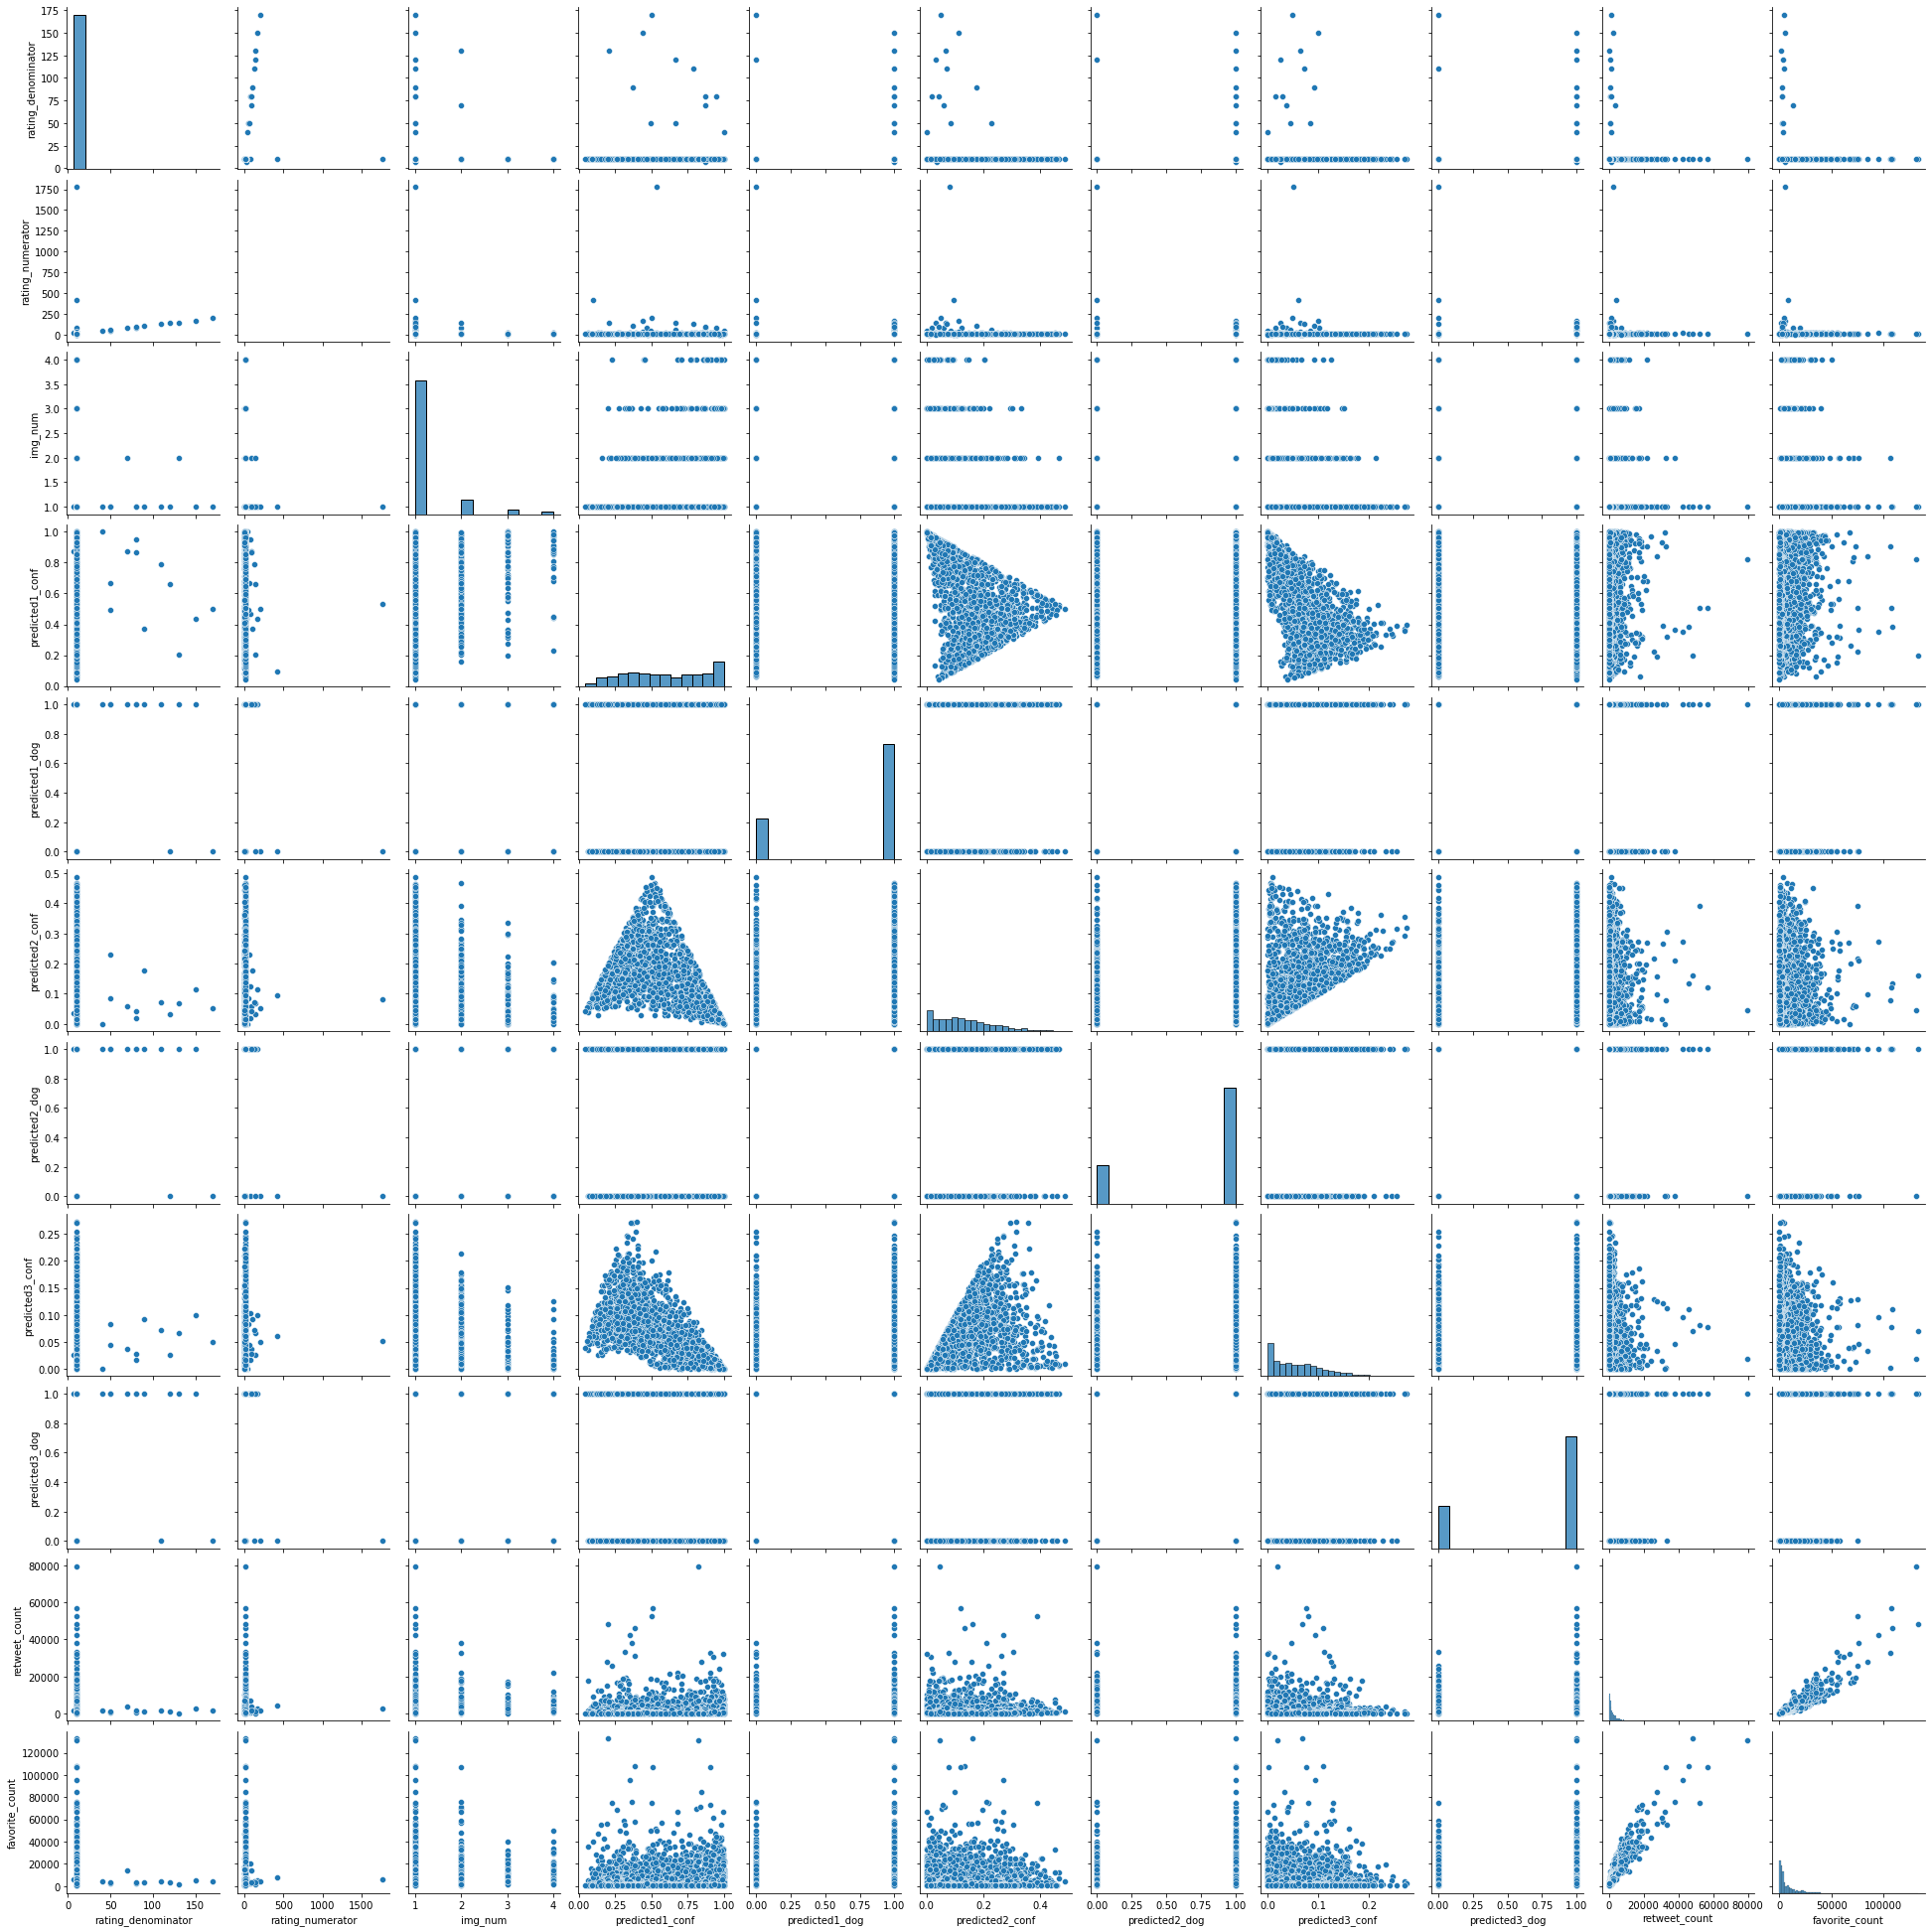

In [81]:
#using pairplot function to have an overview of visual representaton of our data
sb.pairplot(twitter_archive_master)
plt.show()

## Correlation between number of retweets and favorite

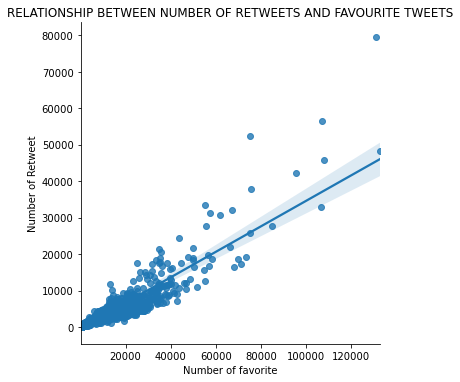

In [82]:
# plotting a regression plot showing showing relationship between rtweets and favourite likes
sb.lmplot(data=twitter_archive_master, x='favorite_count',y= 'retweet_count')
plt.xlabel('Number of favorite')
plt.ylabel('Number of Retweet')
plt.title('RELATIONSHIP BETWEEN NUMBER OF RETWEETS AND FAVOURITE TWEETS')
plt.savefig(fname='favret', dpi=100,bbox_inches='tight')

In [83]:
twitter_archive_master[['favorite_count','retweet_count']].corr()

favorite_count  retweet_count
favorite_count        1.000000       0.912947
retweet_count         0.912947       1.000000

#### INSIGHT 1:
###### There is 78% positive correlation between number of tweets retweeted and liked. This suggest that there is a strong connection between a loiked and retweeted tweet such that a tweet with a lot of likes will most likely have a lot of retweets

### COMMONEST USED NICKNAME

In [84]:
# counting the frequency  of unique values in the dog_connotation column 
twitter_archive_master.dog_connotation.value_counts()

pupper          203
doggo            63
puppo            22
doggopupper       9
floofer           7
puppodoggo        1
flooferdoggo      1
Name: dog_connotation, dtype: int64

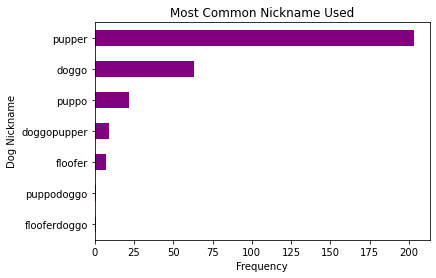

In [85]:
# plotting a a barchart showing MOST COMMON NICKNAME USED
twitter_archive_master.dog_connotation.dropna().value_counts(ascending=True).plot(kind='barh', color='purple')
plt.ylabel('Dog Nickname')
plt.xlabel('Frequency')
plt.title('Most Common Nickname Used')
plt.savefig(fname='Nickname.jpg', dpi= 200)

#### INSIGHT 3:
###### From the bar chart above, golden_retriever and Labrador_retriever are the most predicted breed from the image posted 

------------
## SOURCE OF TWEETS

In [86]:
twitter_archive_master.source.value_counts()

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

In [87]:
(2014/2055)*100

98.00486618004867

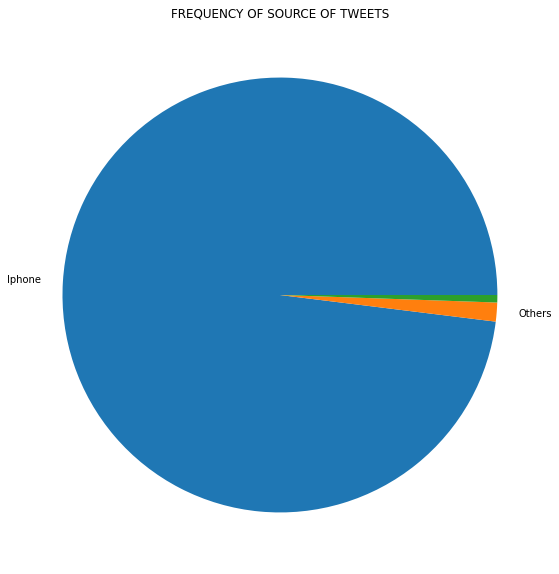

In [88]:
# plotting a piechart showing MOST COMMON source of tweet
fig, ax = plt.subplots(figsize= (10,10))
plt.pie(twitter_archive_master.source.value_counts(), labels= ['Iphone', 'Others', ''])
plt.title('FREQUENCY OF SOURCE OF TWEETS')
plt.savefig(fname='pie1')

#### INSIGHT:
###### Most of the tweets came from Iphone users

In [89]:
twitter_archive_master.describe()

rating_denominator  rating_numerator      img_num  predicted1_conf  \
count         1994.000000       1994.000000  1994.000000      1994.000000   
mean            10.510030         12.273821     1.203109         0.593941   
std              7.261522         41.487825     0.560777         0.271954   
min              7.000000          0.000000     1.000000         0.044333   
25%             10.000000         10.000000     1.000000         0.362857   
50%             10.000000         11.000000     1.000000         0.587635   
75%             10.000000         12.000000     1.000000         0.846285   
max            170.000000       1776.000000     4.000000         1.000000   

       predicted2_conf  predicted3_conf  retweet_count  favorite_count  
count     1.994000e+03     1.994000e+03    1994.000000     1994.000000  
mean      1.344195e-01     6.024848e-02    2766.753260     8895.725677  
std       1.006807e-01     5.089067e-02    4674.698447    12213.193181  
min       1.011300e-08     1.740170e-10      16.000000       81.000000  
25%       5.393987e-02     1.619283e-02     624.750000     1982.000000  
50%       1.174550e-01     4.950530e-02    1359.500000     4136.000000  
75%       1.951377e-01     9.159438e-02    3220.000000    11308.000000  
max       4.880140e-01     2.734190e-01   79515.000000   132810.000000

<a id='references'></a>
--------------
## REFERENCES
> https://www.youtube.com/watch?v=yCgJGsg0Xa4&list=PLXwISwBsZoZd5mOZY9QcnvgG4PB0gtONP&index=26
>https://pbpython.com/pandas_dtypes.html#:~:text=%20In%20order%20to%20convert%20data%20types%20in,as%20to_numeric%20%28%29%20or%20to_datetime%20%28%29%20More%20
>https://www.geeksforgeeks.org/how-to-drop-rows-in-dataframe-by-conditions-on-column-values/
>https://towardsdatascience.com/creating-conditional-columns-on-pandas-with-numpy-select-and-where-methods-8ee6e2dbd5d5
>https://stackoverflow.com/questions/49535664/how-to-hyperlink-in-a-jupyter-notebook